This project requires an analysis of a Brazilian e-commerce public dataset of orders made at Olist Store. 
The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. 
Its features allow viewing orders from multiple dimensions: from order status, price, payment, and freight performance to 
customer location, product attributes, and finally, reviews written by customers. 
There is also a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymized, and references to the companies and partners in the review text have 
been replaced with the names of Game of Thrones great houses.


**Context**

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.


By Christopher wachira.

### EDA and price prediction on Brazillian E-commerce olist store dataset

#### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = None
import plotly.express as px

#### Importing, checking number of rows and columns and checking on missing values on individual datasets

The dataset is available on kaggle, https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [2]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [3]:
order_items.shape

(112650, 7)

In [4]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Order items dataset has no missing values, and has 112650 rows and 7 columns

In [5]:
products = pd.read_csv('olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
products.shape

(32951, 9)

In [7]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [8]:
product = products.dropna()
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [9]:
product.shape

(32340, 9)

Products datasets had 32951 rows and 9 columns, which after dropping the mising values became 32340 rows and 9 columns

In [10]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
sellers.shape

(3095, 4)

In [12]:
sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Sellers dataset has no misising values, with 3095 rows and 4 columns

In [13]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [14]:
geolocation.shape


(1000163, 5)

In [15]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Geolocation dataset has 1000163 rows and  5 columns

In [16]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
orders.shape

(99441, 8)

In [18]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [19]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
orders = orders.dropna()

orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [21]:
orders.shape

(96461, 8)

Orders dataset had 96461 rows and 8 columns which were achieved after dropping missing values

In [22]:
customers = pd.read_csv('olist_customers_dataset.csv ')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [23]:
customers.shape

(99441, 5)

In [24]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Customers dataset has 99441 rows and 5 columns, with no missing values

In [25]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [26]:
order_payments.shape

(103886, 5)

In [27]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

order_payments dataset has 103886rows and 5 columns, no missing values

In [28]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [29]:
order_reviews.shape

(99224, 7)

In [30]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [31]:
order_reviews = order_reviews.drop(columns = ['review_comment_title','review_comment_message'])
order_reviews.head()

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53


In [32]:
order_reviews.shape

(99224, 5)

In [33]:
order_reviews.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

Order_reviews has 100000 rows and 5 columns which were attained after dropping review_comment_title and review_comment_message
columns which had missing values and were not nessessary in analysis and price prediction.

#### Merging the datasets

Since we have seller city seller state, customer city and customer state columns, geolocation is not particularly important

In [34]:
# Merge orders and order_payments DataFrames on the common column "order_id"
df = orders.merge(order_payments, on="order_id")

# Merge the resulting DataFrame with the customers DataFrame on the common column "customer_id"
df = df.merge(customers, on="customer_id")

# Merge the resulting DataFrame with the order_items DataFrame on the common column "order_id"
df = df.merge(order_items, on="order_id")

# Merge the resulting DataFrame with the products DataFrame on the common column "product_id"
df = df.merge(products, on="product_id")

# Merge the resulting DataFrame with the order_reviews DataFrame on the common column "order_id"
df = df.merge(order_reviews, on="order_id")

# Merge the resulting DataFrame with the sellers DataFrame on the common column "seller_id"
df = df.merge(sellers, on="seller_id")

# Assign the final merged DataFrame to the variable "olist"
olist = df

# Display the first few rows of the merged DataFrame "olist"
olist.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,19.0,8.0,13.0,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00,2017-10-12 03:43:48,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,19.0,13.0,19.0,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00,2018-08-08 18:37:50,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,24.0,19.0,21.0,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18 00:00:00,2018-08-22 19:07:58,14840,guariba,SP


In [35]:
olist.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_length_cm,product_height_cm,product_width_cm,review_id,review_score,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
114837,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1,credit_card,...,40.0,10.0,40.0,29bb71b2760d0f876dfa178a76bc4734,4,2018-03-01 00:00:00,2018-03-02 17:50:01,17602,tupa,SP
114838,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1,credit_card,...,32.0,90.0,22.0,371579771219f6db2d830d50805977bb,5,2017-09-22 00:00:00,2017-09-22 23:10:57,8290,sao paulo,SP
114839,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,...,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26 00:00:00,2018-01-27 09:16:56,37175,ilicinea,MG
114840,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1,credit_card,...,20.0,20.0,20.0,8ab6855b9fe9b812cd03a480a25058a1,2,2018-01-26 00:00:00,2018-01-27 09:16:56,37175,ilicinea,MG
114841,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03 00:00:00,1,debit_card,...,16.0,7.0,15.0,dc9c59b4688062c25758c2be4cafc523,5,2018-03-17 00:00:00,2018-03-17 16:33:31,14407,franca,SP


### Time series analysis

#### Sales over the years

#### Using order_purchase_timestamp column

In [36]:
# convert order_purchase_timestamp to datetime
olist["order_purchase_timestamp"] = pd.to_datetime(olist["order_purchase_timestamp"])
olist["order_purchase_timestamp"].head()

0   2017-10-02 10:56:33
1   2017-10-02 10:56:33
2   2017-10-02 10:56:33
3   2018-07-24 20:41:37
4   2018-08-08 08:38:49
Name: order_purchase_timestamp, dtype: datetime64[ns]

In [37]:
# Extract year
olist_year = olist["order_purchase_timestamp"].dt.year
olist_year.head()

0    2017
1    2017
2    2017
3    2018
4    2018
Name: order_purchase_timestamp, dtype: int32

<Axes: xlabel='order_purchase_timestamp', ylabel='count'>

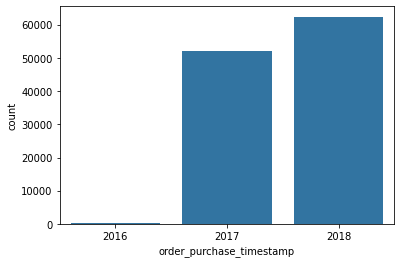

In [38]:
sns.countplot(x = olist_year)

#### Using order delivery date column

In [39]:
# convert order_purchase_timestamp to datetime
olist["order_estimated_delivery_date"] = pd.to_datetime(olist["order_estimated_delivery_date"])
olist["order_estimated_delivery_date"].head()

0   2017-10-18
1   2017-10-18
2   2017-10-18
3   2018-08-13
4   2018-09-04
Name: order_estimated_delivery_date, dtype: datetime64[ns]

In [40]:
# Extract year
olist_year = olist["order_estimated_delivery_date"].dt.year
olist_year.head()

0    2017
1    2017
2    2017
3    2018
4    2018
Name: order_estimated_delivery_date, dtype: int32

<Axes: xlabel='order_estimated_delivery_date', ylabel='count'>

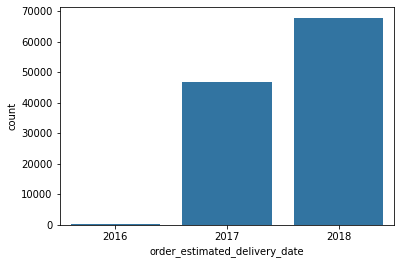

In [41]:
sns.countplot(x = olist_year)

From both countplots, sales increased over the years

#### Exploring the dataset

In [42]:
olist.shape

(114842, 37)

Olist dataset has 115711 rows and 37 columns

In [43]:
olist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114842 entries, 0 to 114841
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114842 non-null  object        
 1   customer_id                    114842 non-null  object        
 2   order_status                   114842 non-null  object        
 3   order_purchase_timestamp       114842 non-null  datetime64[ns]
 4   order_approved_at              114842 non-null  object        
 5   order_delivered_carrier_date   114842 non-null  object        
 6   order_delivered_customer_date  114842 non-null  object        
 7   order_estimated_delivery_date  114842 non-null  datetime64[ns]
 8   payment_sequential             114842 non-null  int64         
 9   payment_type                   114842 non-null  object        
 10  payment_installments           114842 non-null  int64         
 11  

### Cleaning olist dataset

#### Missing values

In [44]:
olist.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1625
product_name_lenght              1625
product_description_lenght       1625
product_photos_qty               1625
product_weig

In [45]:
olist.product_category_name.shape

(114842,)

In [46]:
# Dropping missing values
olist = olist.dropna()
olist.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

#### Duplicates

In [47]:
olist.duplicated().sum()

0

Since not all columns are necessary in this analysis, drop the unnecessary ones

In [48]:
olist.drop(['order_id','order_item_id','product_id','seller_id','shipping_limit_date',
                            'seller_zip_code_prefix'],axis=1, inplace= True)


In [49]:
olist.drop(['order_delivered_carrier_date', 'order_delivered_customer_date',
              'customer_unique_id','customer_zip_code_prefix','review_id'],axis=1, inplace= True)

In [50]:
olist.drop(['review_creation_date','customer_id','order_estimated_delivery_date',
              'order_purchase_timestamp', 'order_approved_at','review_answer_timestamp'],axis=1, inplace= True)

In [51]:
olist.columns

Index(['order_status', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_city',
       'customer_state', 'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score', 'seller_city',
       'seller_state'],
      dtype='object')

#### Getting the categotical and numerical variables

In [52]:
categorical_variables_df= olist.select_dtypes(include=['object'])
categorical_variables_df.columns

Index(['order_status', 'payment_type', 'customer_city', 'customer_state',
       'product_category_name', 'seller_city', 'seller_state'],
      dtype='object')

In [53]:
numerical_variables_df= olist.select_dtypes(exclude=['object'])
numerical_variables_df.columns

Index(['payment_sequential', 'payment_installments', 'payment_value', 'price',
       'freight_value', 'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'review_score'],
      dtype='object')

#### checking for outliers

<function matplotlib.pyplot.show(close=None, block=None)>

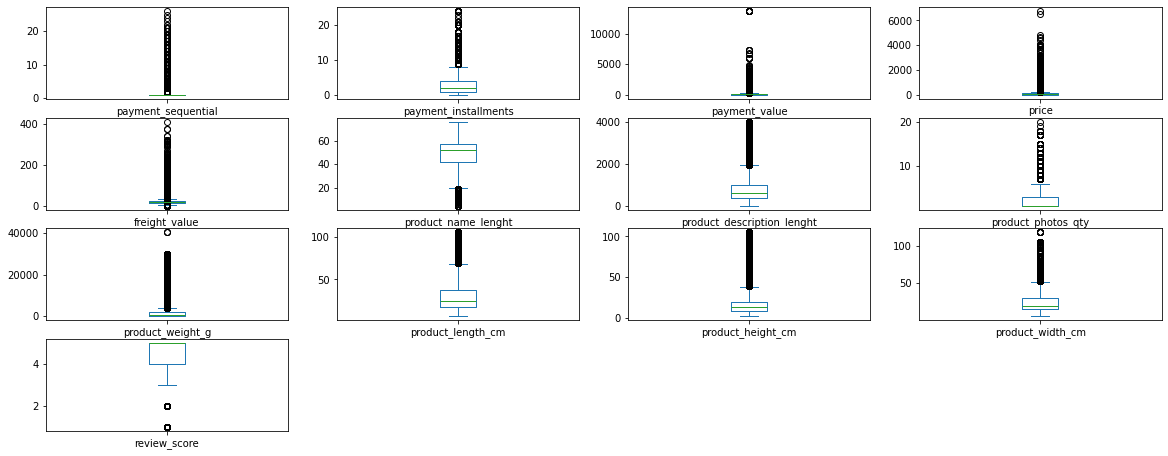

In [54]:
numerical_variables_df.plot(kind='box', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

There are so many outliers where product_name_length, product_lenth_cm and review score has the least outliers

Log function will help reduce the outliers

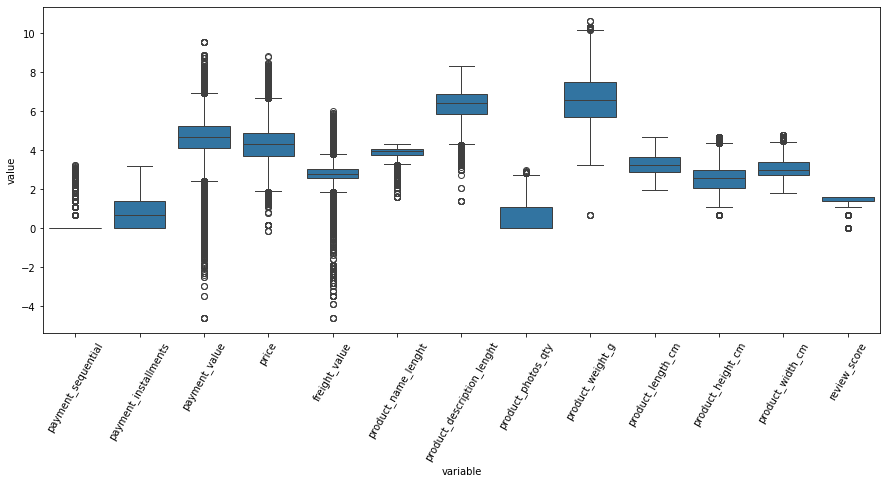

In [55]:
for c in numerical_variables_df:
    numerical_variables_df[c] = np.log(numerical_variables_df[c])
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
df = pd.DataFrame(data = numerical_variables_df, columns = numerical_variables_df.columns)

sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df))
plt.xticks(rotation=60)

plt.show()

#### Descriptive statistics

We get to see the mean, standard deviation, minimum and maximum values and the quartiles

In [56]:
olist.describe()

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000,113216.000000
mean,1.090809,2.943515,171.577925,119.869740,20.002353,48.804224,784.725710,2.206967,2106.346400,30.276922,16.598652,23.099412,4.082365
std,0.686610,2.779137,264.218677,181.127416,15.710909,10.015776,650.300338,1.718318,3765.034692,16.144080,13.436740,11.734956,1.346005
min,1.000000,0.000000,0.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.850000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,107.970000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,189.160000,132.985000,21.190000,57.000000,982.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,26.000000,24.000000,13664.080000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


### Explolatory data analysis

#### Univaraite Analysis

#### Most and least selling items

In [57]:
olist.product_category_name.nunique()

73

##### Most selling items

Text(0, 0.5, 'Proportion')

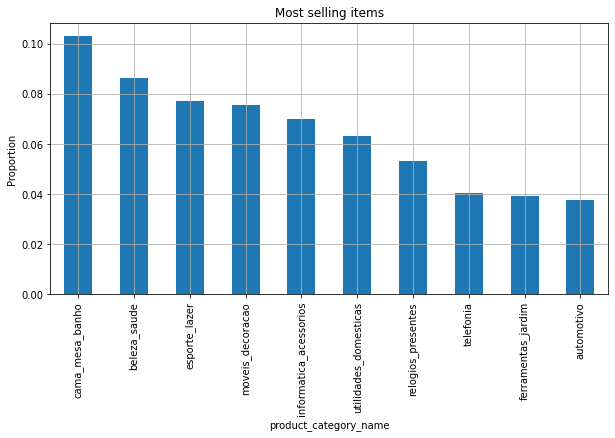

In [58]:
olist.product_category_name.value_counts(normalize = True)[:10].plot.bar(figsize=(10, 5), grid = True)
plt.title('Most selling items')
plt.ylabel('Proportion')


##### least selling items

Text(0, 0.5, 'Proportion')

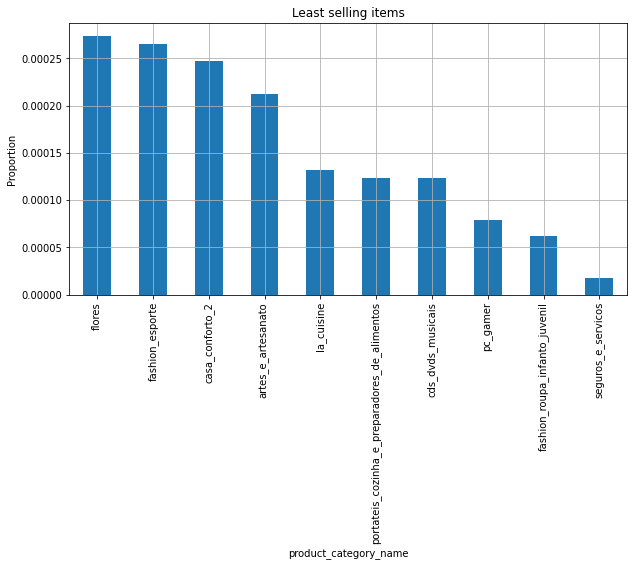

In [59]:
olist.product_category_name.value_counts(normalize = True)[63:].plot.bar(figsize=(10, 5), grid = True)
plt.title('Least selling items')
plt.ylabel('Proportion')

#### Products review scores

Text(0, 0.5, 'Proportion')

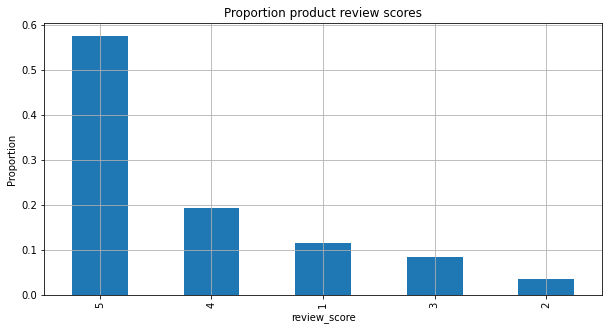

In [60]:
olist.review_score.value_counts(normalize = True).plot.bar(figsize=(10, 5), grid = True)
plt.title('Proportion product review scores')
plt.ylabel('Proportion')

Over 55% of theproducts had the highest review score of 5

##### 10 products with highest average review scores

Text(0, 0.5, 'Proportion')

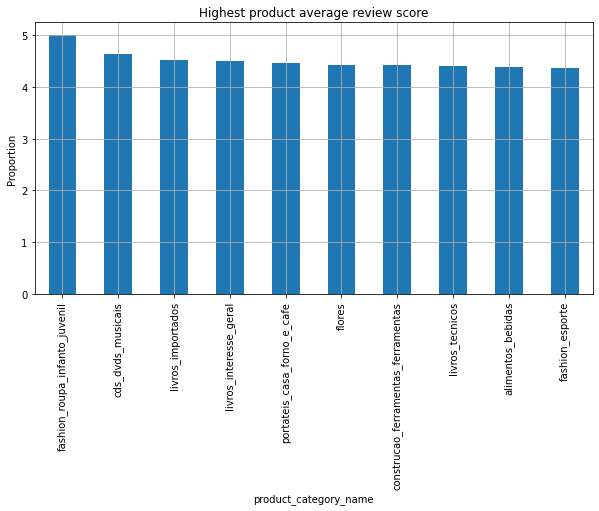

In [61]:
review_count = olist.groupby("product_category_name").review_score.mean().sort_values(ascending=False)
review_count.head(10).sort_values(ascending=False).plot.bar(figsize=(10, 5), grid = True)
plt.title('Highest product average review score')
plt.ylabel('Proportion')

##### Products with lowest average review scores

Text(0, 0.5, 'Proportion')

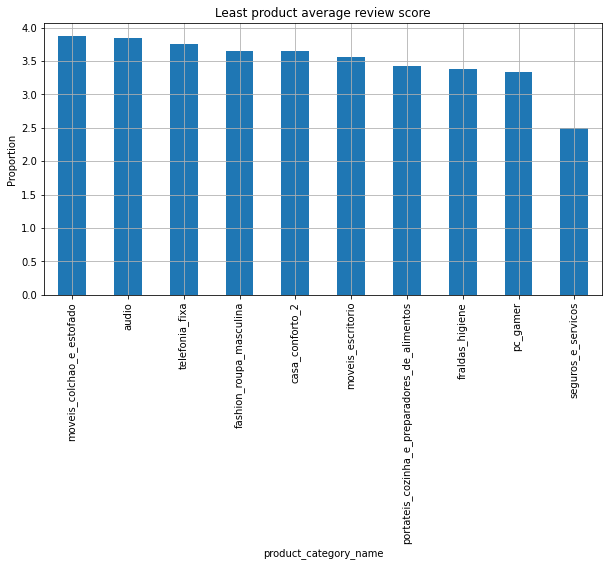

In [62]:
review_count.tail(10).sort_values(ascending=False).plot.bar(figsize=(10, 5), grid = True)
plt.title('Least product average review score')
plt.ylabel('Proportion')

#### Understanding modes of payment

payment_type
credit_card    0.737926
boleto         0.194513
voucher        0.053199
debit_card     0.014362
Name: proportion, dtype: float64


<Axes: xlabel='payment_type', ylabel='count'>

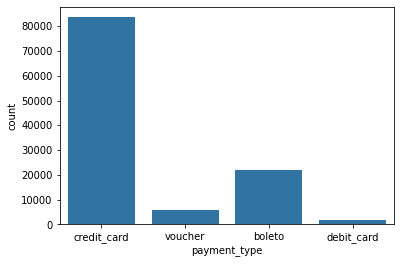

In [63]:
print(olist.payment_type.value_counts(normalize = True, sort=True))
sns.countplot(x=olist.payment_type)

About 74% of customers used credit card as the mode of payment while debit cards were least used

Text(0, 0.5, 'Proportion')

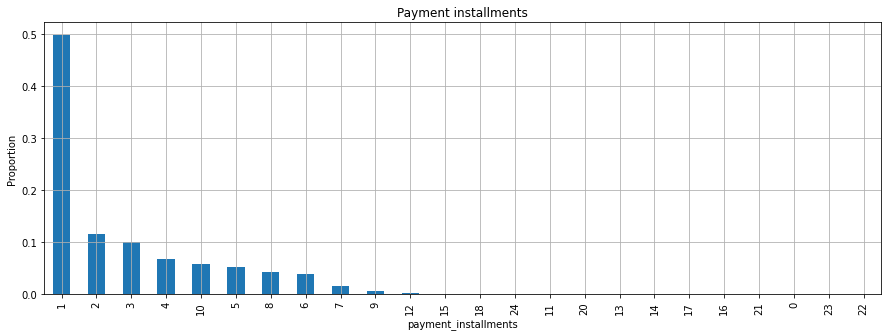

In [64]:
olist.payment_installments.value_counts(normalize =True).sort_values(ascending = False).plot.bar(figsize=(15, 5), grid = True)
plt.title('Payment installments')
plt.ylabel('Proportion')

About 50% of the customers paid in full, while the rest paid in installments

order_status
delivered    0.999938
canceled     0.000062
Name: proportion, dtype: float64


<Axes: xlabel='order_status', ylabel='count'>

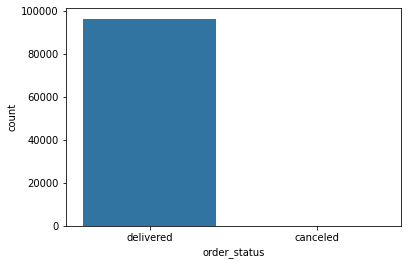

In [65]:
# orders
print(orders.order_status.value_counts(normalize= True))
sns.countplot(x=orders.order_status)

Almost 100% of the orders were delivered

##### proportion of product category names

product_category_name
cama_mesa_banho           0.103201
beleza_saude              0.086110
esporte_lazer             0.077145
moveis_decoracao          0.075555
informatica_acessorios    0.070008
Name: proportion, dtype: float64


Text(0, 0.5, 'Proportion')

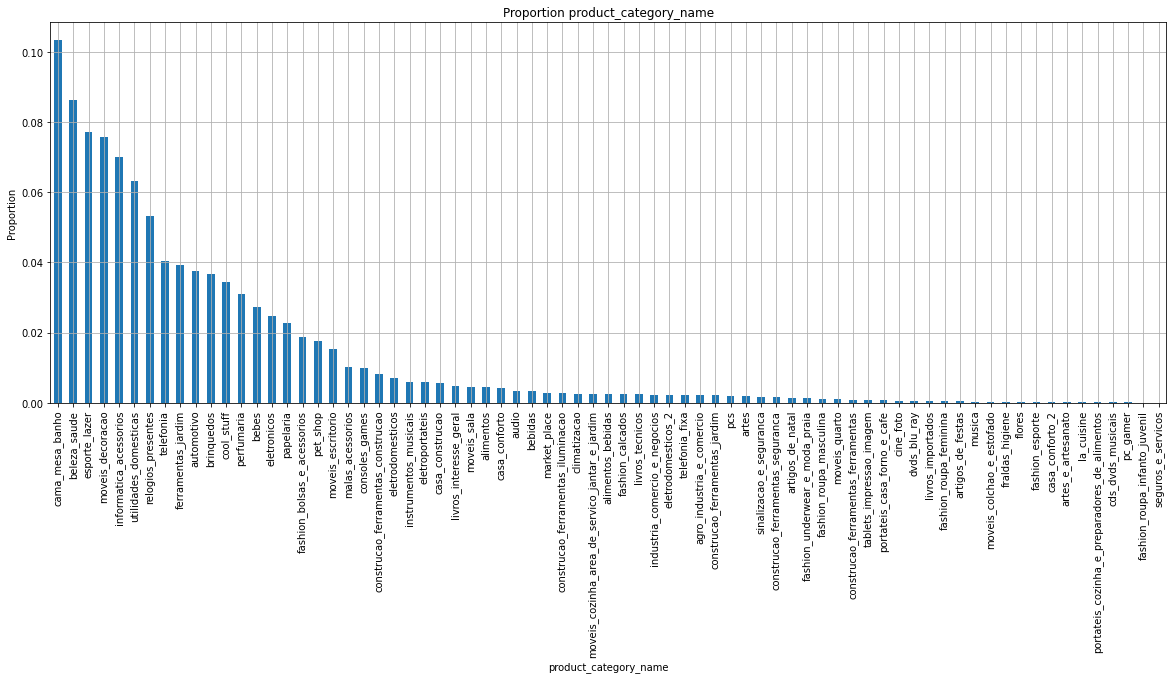

In [66]:
print(olist.product_category_name.value_counts(normalize = True).head())
olist.product_category_name.value_counts(normalize = True).plot.bar(figsize=(20, 7), grid = True)
plt.title('Proportion product_category_name')
plt.ylabel('Proportion')

##### Proportion of Top 50 seller cities

seller_city
sao paulo                0.249187
ibitinga                 0.071518
curitiba                 0.027001
santo andre              0.026975
sao jose do rio preto    0.023256
Name: proportion, dtype: float64


Text(0, 0.5, 'Proportion')

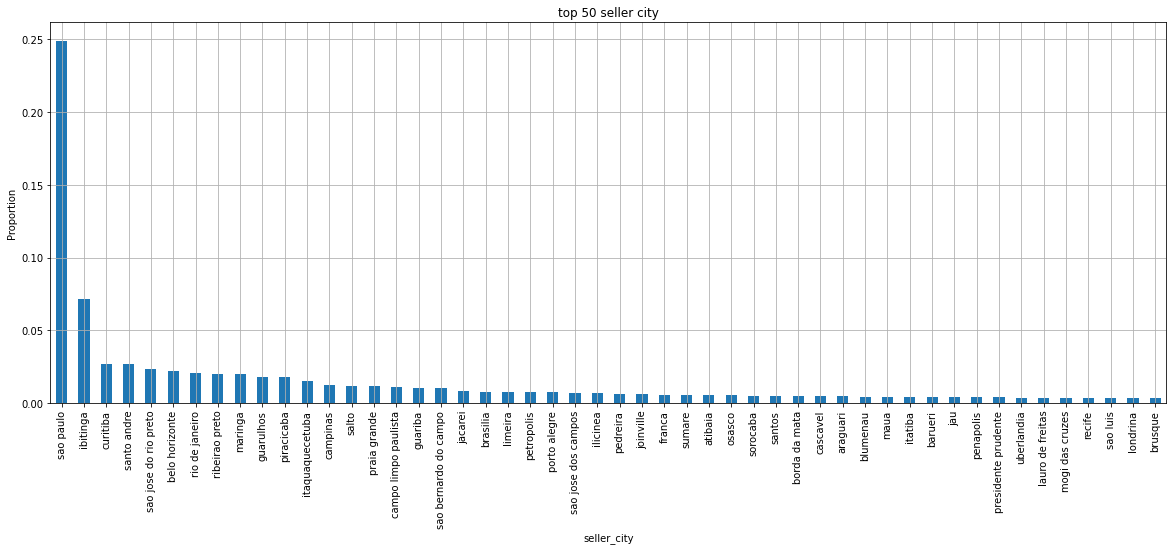

In [67]:
seller_city1 = olist.seller_city.value_counts(normalize = True).sort_values(ascending = False)
print(seller_city1.head())


seller_city1.head(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('top 50 seller city')
plt.ylabel('Proportion')

##### Proportion Least 50 seller cities

Text(0, 0.5, 'Proportion')

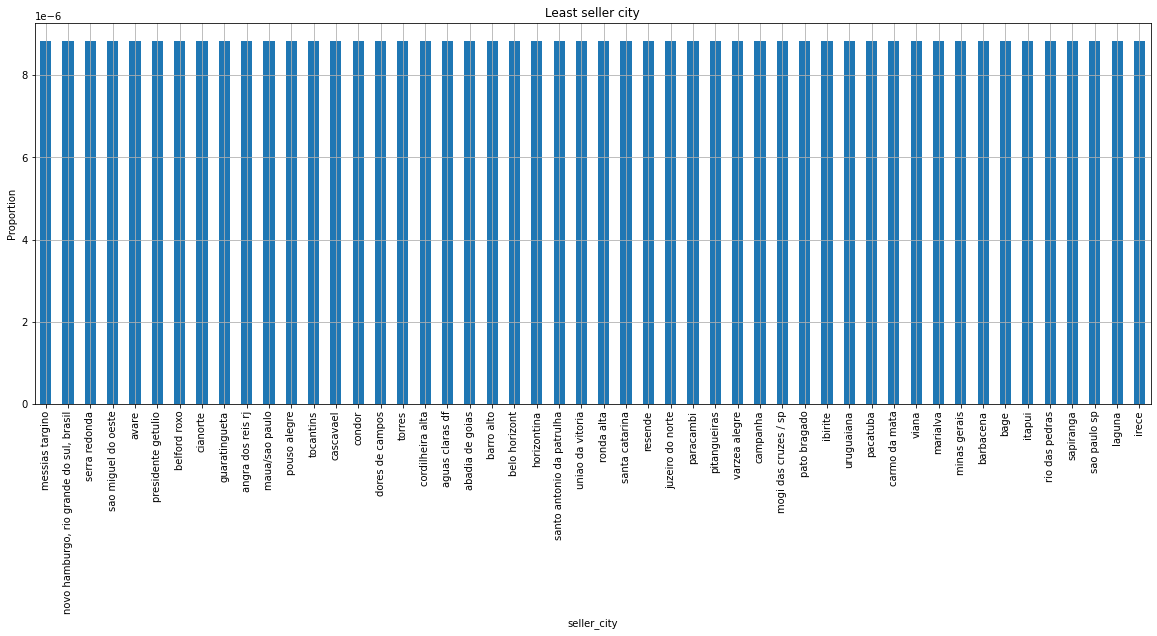

In [68]:
seller_city1.tail(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('Least seller city')
plt.ylabel('Proportion')

##### Proportion of Seller state

seller_state
SP    0.713247
MG    0.077666
PR    0.077330
RJ    0.042211
SC    0.036629
Name: proportion, dtype: float64


Text(0, 0.5, 'Proportion')

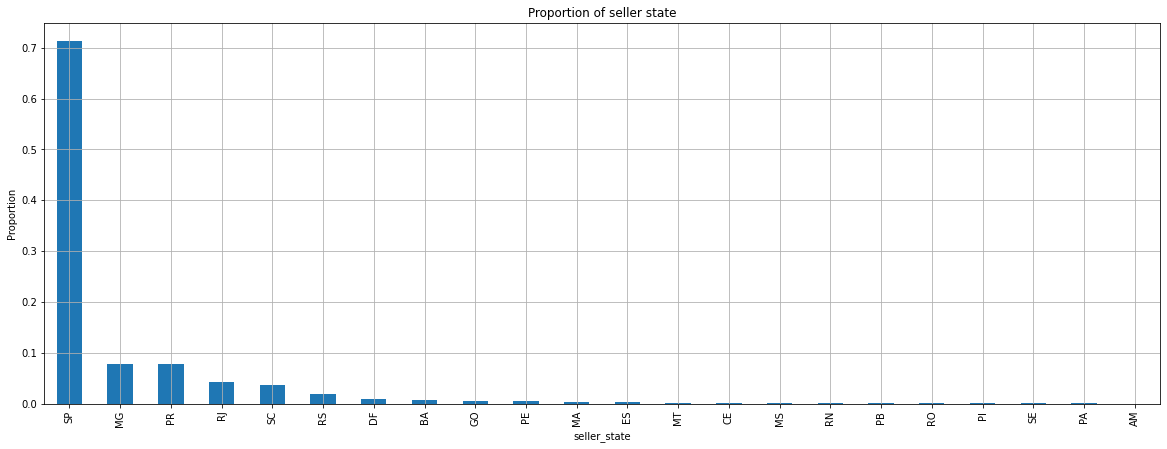

In [69]:
print(olist.seller_state.value_counts(normalize = True).head())
olist.seller_state.value_counts(normalize = True).plot.bar(figsize=(20, 7), grid = True)
plt.title('Proportion of seller state')
plt.ylabel('Proportion')

##### Proportion of Top 50 customer cities

customer_city
sao paulo         0.157858
rio de janeiro    0.068771
belo horizonte    0.027743
brasilia          0.021039
curitiba          0.015607
Name: proportion, dtype: float64


Text(0, 0.5, 'Proportion')

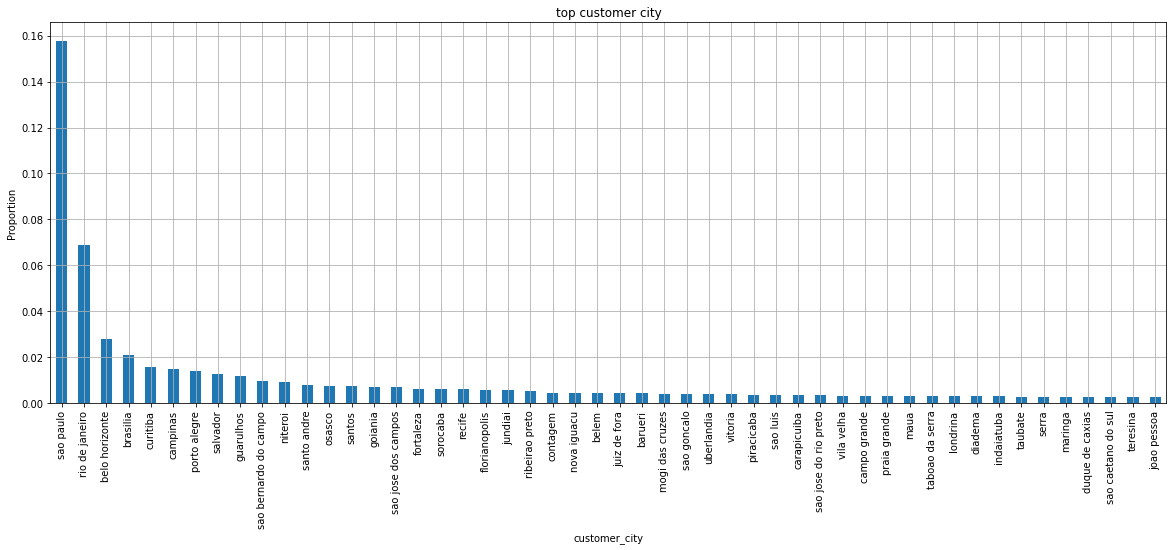

In [70]:
customer_city1 = olist.customer_city.value_counts(normalize = True)
print(customer_city1.head())

customer_city1.head(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('top customer city')
plt.ylabel('Proportion')

#####  Proportion of 50 least cities

Text(0, 0.5, 'Proportion')

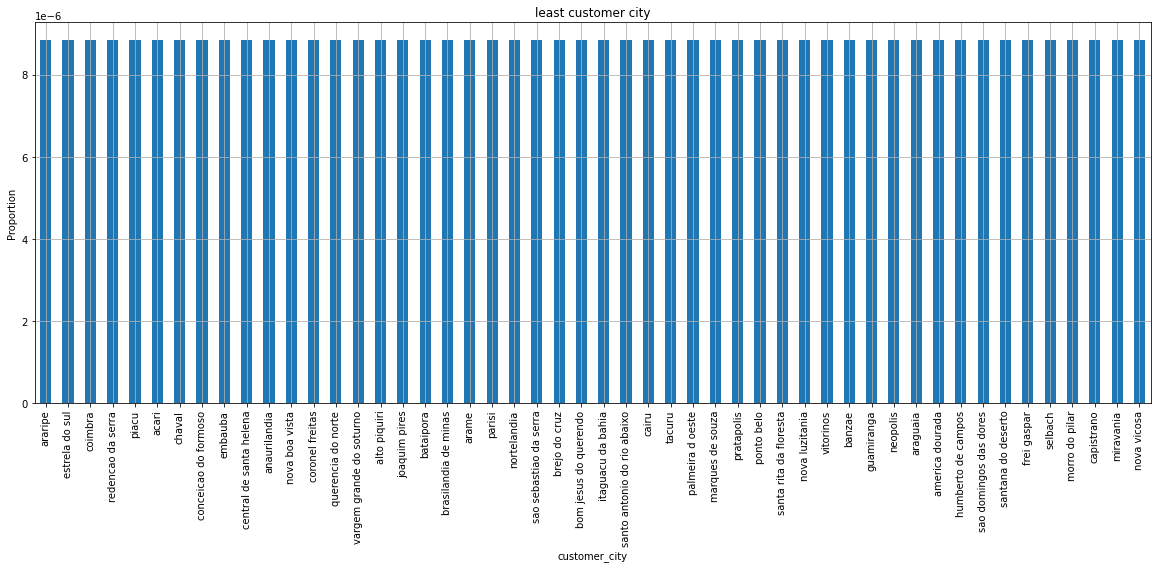

In [71]:
customer_city1 = olist.customer_city.value_counts(normalize = True)
customer_city1.tail(50).head(50).plot.bar(figsize=(20, 7), grid = True)
plt.title('least customer city')
plt.ylabel('Proportion')

##### Proportion of Customer state

customer_state
SP    0.422405
RJ    0.128683
MG    0.116768
RS    0.055752
PR    0.051141
Name: proportion, dtype: float64


Text(0, 0.5, 'Proportion')

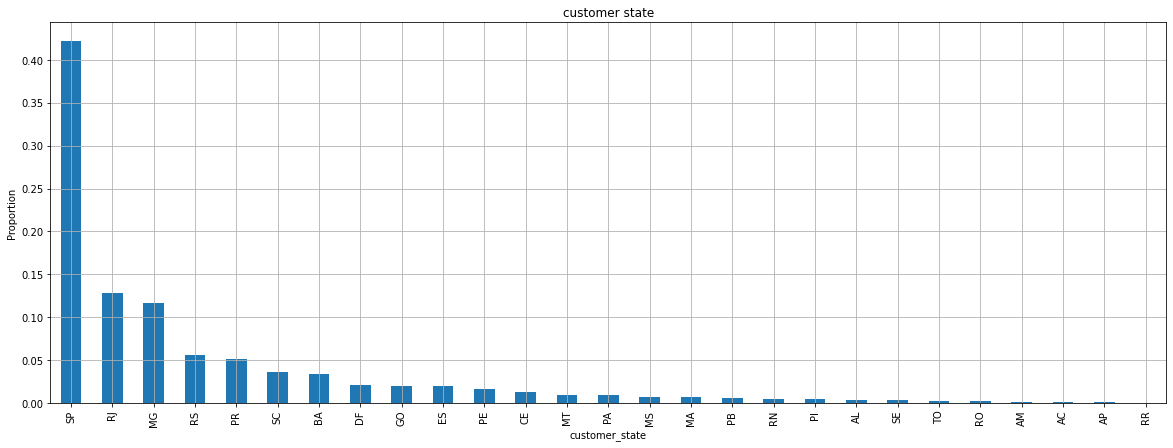

In [72]:
print(olist.customer_state.value_counts(normalize=True).head())
olist.customer_state.value_counts(normalize=True).plot.bar(figsize=(20, 7), grid = True)
plt.title('customer state')
plt.ylabel('Proportion')

### Bivariate Analysis

###### Payment_type and payment installments using cross tabulation

In [73]:
olist.groupby('payment_type')['payment_installments'].mean()

payment_type
boleto         1.000000
credit_card    3.633754
debit_card     1.000000
voucher        1.000000
Name: payment_installments, dtype: float64

In [74]:
pay_inst = pd.crosstab(olist.payment_installments, olist.payment_type)
pay_inst.head()

payment_type,boleto,credit_card,debit_card,voucher
payment_installments,,,,
0,0,3,0,0
1,22022,26747,1626,6023
2,0,13155,0,0
3,0,11317,0,0
4,0,7694,0,0


<Axes: xlabel='payment_installments'>

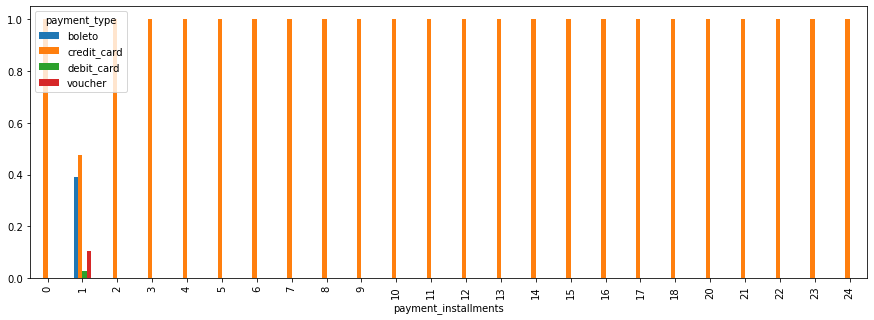

In [75]:
pay_inst.div(pay_inst.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(15, 5))

Only credit card users paid in installments

##### Prices of the products

<Axes: xlabel='product_category_name', ylabel='price'>

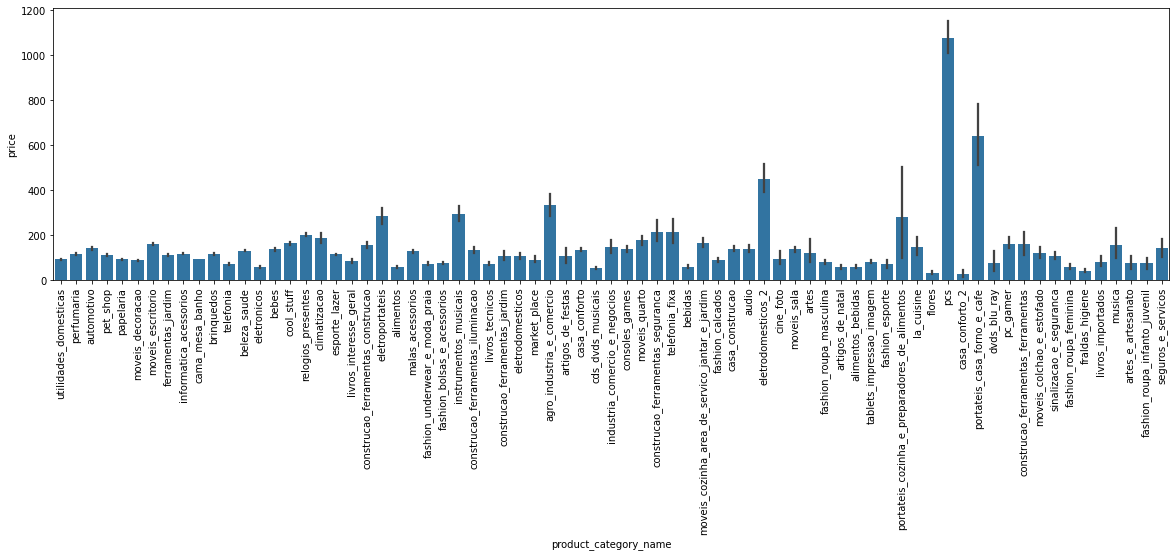

In [76]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.product_category_name, y=olist.price)

##### Products prices in different seller states

<Axes: xlabel='seller_state', ylabel='price'>

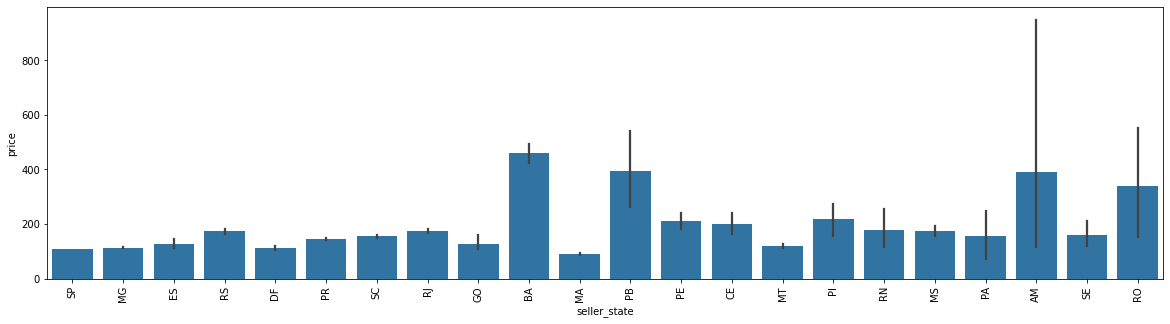

In [77]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.seller_state, y=olist.price)

##### product pricesin different customer states

<Axes: xlabel='customer_state', ylabel='price'>

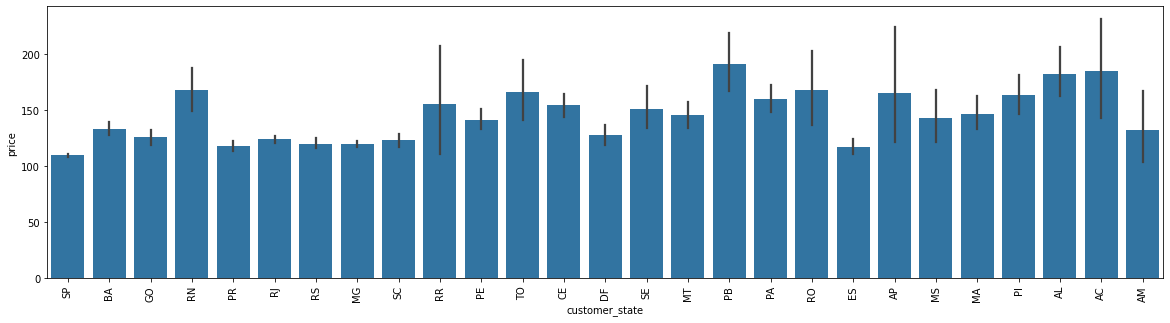

In [78]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.customer_state, y=olist.price)

##### Effect of type of payment on price 

<Axes: xlabel='payment_type', ylabel='price'>

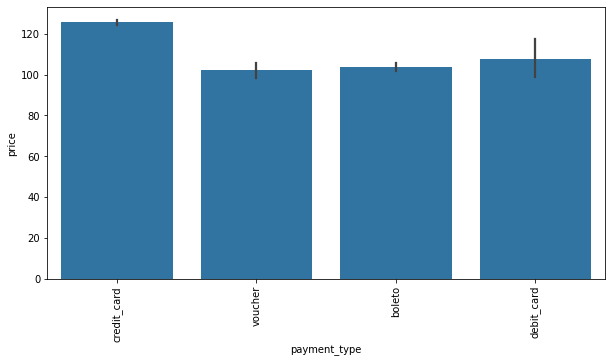

In [79]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(x=olist.payment_type, y=olist.price)

##### Product average prices in different customer city 

In [80]:
customer_city2 = olist.groupby('customer_city')['price'].mean().sort_values(ascending = False)
customer_city2.head(10)

customer_city
pianco                     2200.00
nova esperanca do piria    2199.00
engenheiro navarro         1997.00
sape                       1850.00
mariental                  1799.00
loreto                     1599.99
ibitita                    1450.00
bonfinopolis de minas      1359.90
pirpirituba                1340.00
barao ataliba nogueira     1300.00
Name: price, dtype: float64

In [81]:
customer_city2.tail(10)

customer_city
bom jardim de goias             10.00
tamboara                         8.99
medicilandia                     8.99
macieira                         8.73
erico cardoso                    8.09
jenipapo de minas                7.48
senador jose porfirio            6.00
santo antonio do rio abaixo      6.00
sabaudia                         5.90
polo petroquimico de triunfo     5.60
Name: price, dtype: float64

###### Average prices of products in different seller cities

In [82]:
seller_city2 = olist.groupby('seller_city')['price'].mean().sort_values(ascending = False)
seller_city2.head(10)

seller_city
bofete                   3133.323333
california               1271.666667
paincandu                1228.493750
montes claros             941.000000
mamanguape                912.115000
dores de campos           899.000000
luiz alves                841.187500
sao  jose dos pinhais     799.000000
guanambi                  796.454545
sombrio                   739.481818
Name: price, dtype: float64

In [83]:
seller_city2.tail(10)

seller_city
garulhos        18.692500
barrinha        18.245000
aparecida       17.633673
pelotas         16.950000
andira-pr       16.900000
jarinu          14.630000
macatuba        13.000000
floranopolis     9.990000
palotina         9.990000
brotas           6.250000
Name: price, dtype: float64

##### Here, we will create will drop seller city and customer city columns as they have so many variables, for further analysis

In [84]:
categorical_variables_df.columns

Index(['order_status', 'payment_type', 'customer_city', 'customer_state',
       'product_category_name', 'seller_city', 'seller_state'],
      dtype='object')

In [85]:
categorical_vars = categorical_variables_df.drop(['seller_city','customer_city'],axis = 1)
categorical_vars.columns

Index(['order_status', 'payment_type', 'customer_state',
       'product_category_name', 'seller_state'],
      dtype='object')

In [86]:
categorical_vars['price']=olist.price
olist.price.describe()

count    113216.000000
mean        119.869740
std         181.127416
min           0.850000
25%          39.900000
50%          74.900000
75%         132.985000
max        6735.000000
Name: price, dtype: float64

In [87]:
bins = [0,40,75,133,6735]
group=['Low','Average','High', 'Very High'] 
categorical_vars['price_cat'] = pd.cut(categorical_vars['price'], bins, labels=group)
categorical_vars.head()

,order_status,payment_type,customer_state,product_category_name,seller_state,price,price_cat
0,delivered,credit_card,SP,utilidades_domesticas,SP,29.99,Low
1,delivered,voucher,SP,utilidades_domesticas,SP,29.99,Low
2,delivered,voucher,SP,utilidades_domesticas,SP,29.99,Low
3,delivered,boleto,BA,perfumaria,SP,118.70,High
4,delivered,credit_card,GO,automotivo,SP,159.90,Very High


In [88]:
categorical_variables_df_1 = categorical_vars.drop(['price','price_cat'],axis = 1)
price_cat = categorical_vars.price_cat

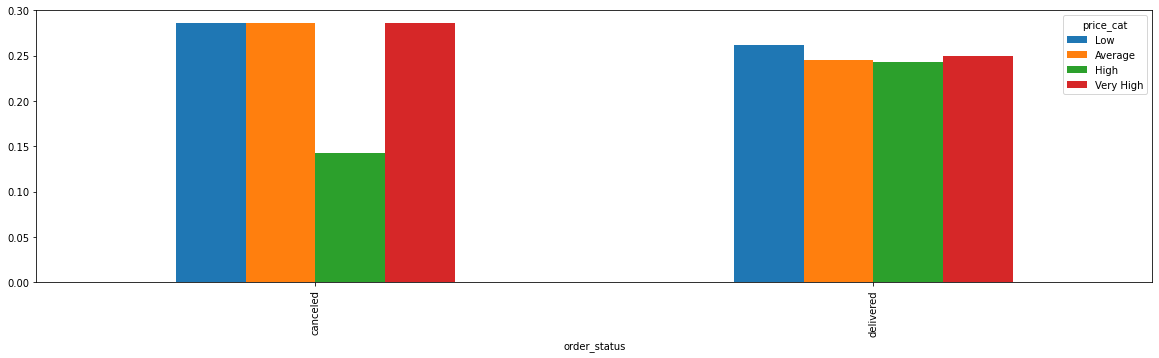

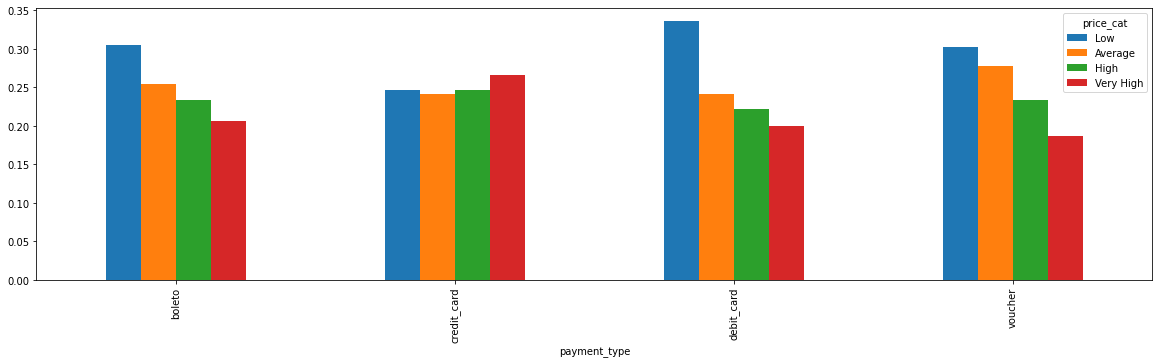

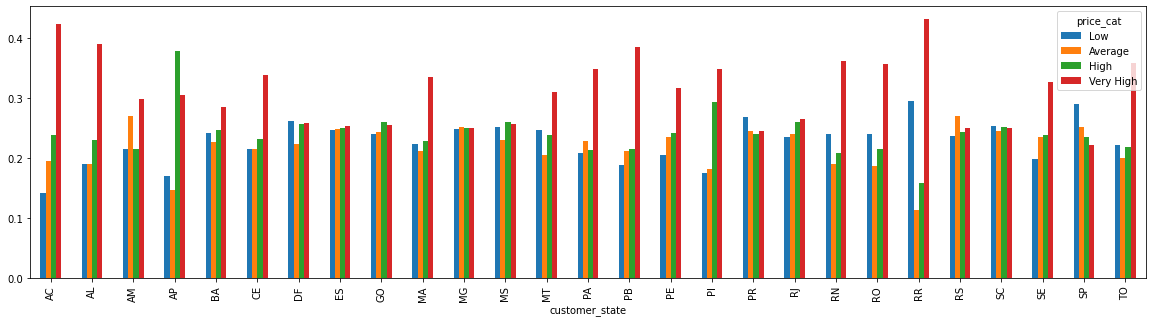

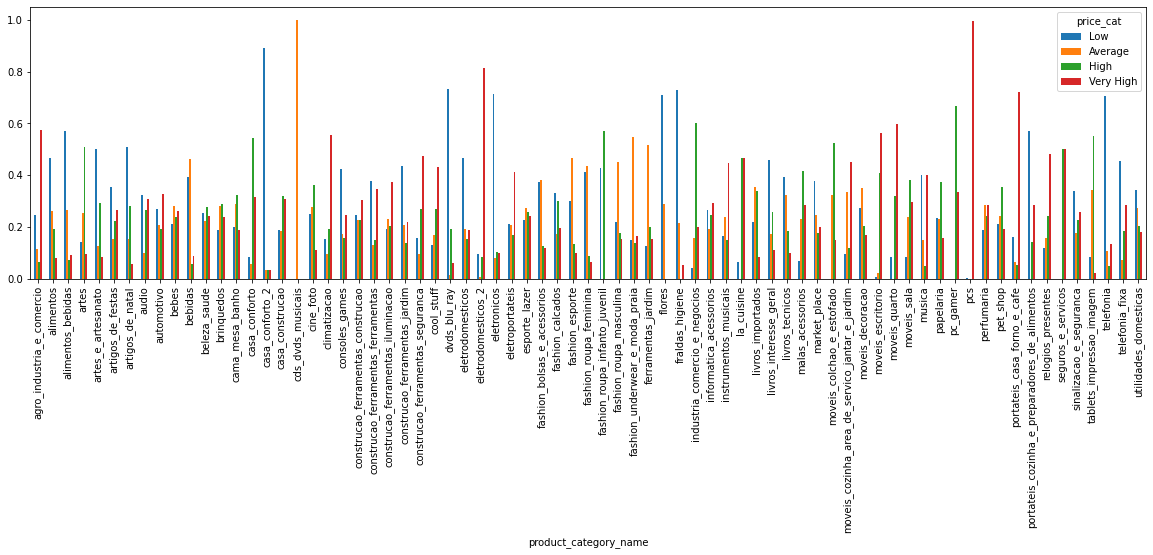

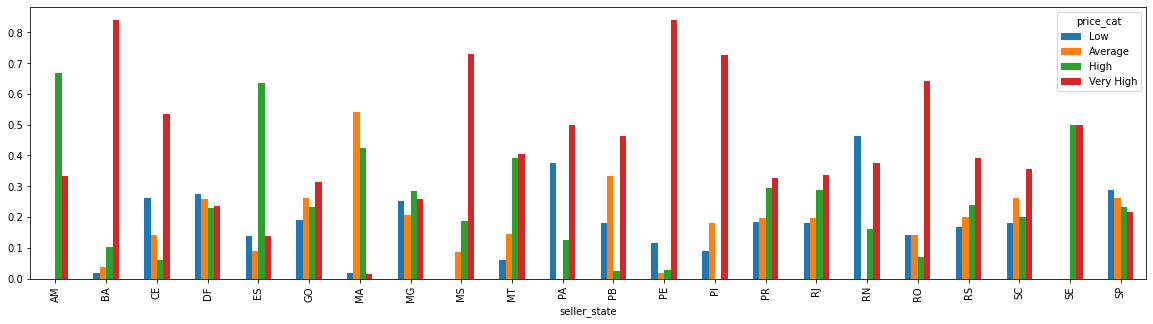

In [89]:
for col in categorical_variables_df_1:
    price_bin=pd.crosstab(categorical_variables_df[col], price_cat) 
    price_bin.div(price_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(20, 5)) 
plt.show()

### Continuous variables visualization

#### Histograms

<function matplotlib.pyplot.show(close=None, block=None)>

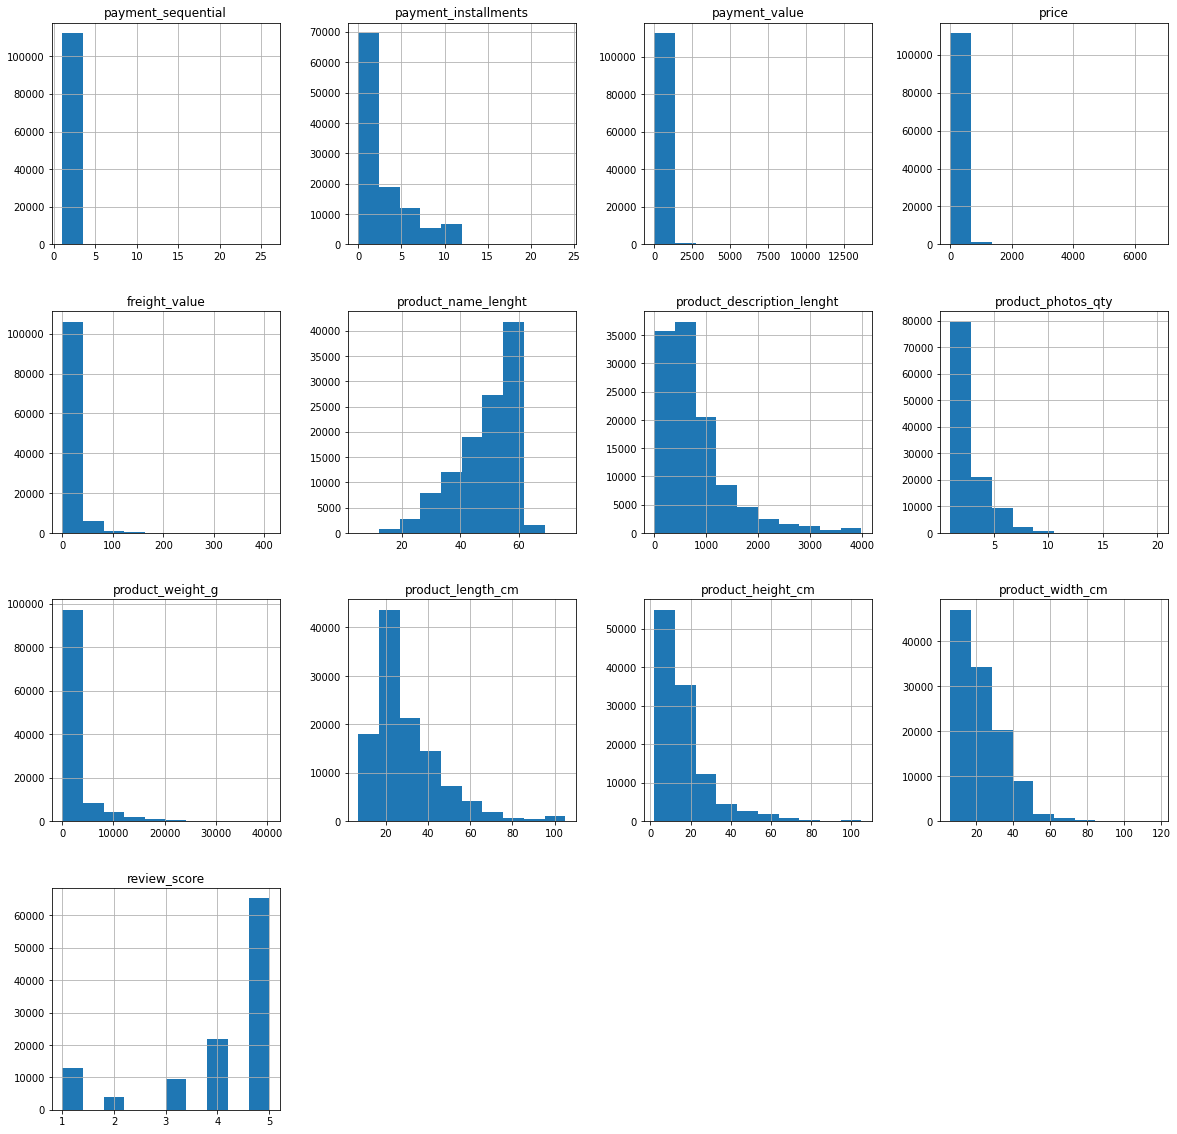

In [90]:
olist.hist(figsize=(20,20))
plt.show

#### Density plots

<function matplotlib.pyplot.show(close=None, block=None)>

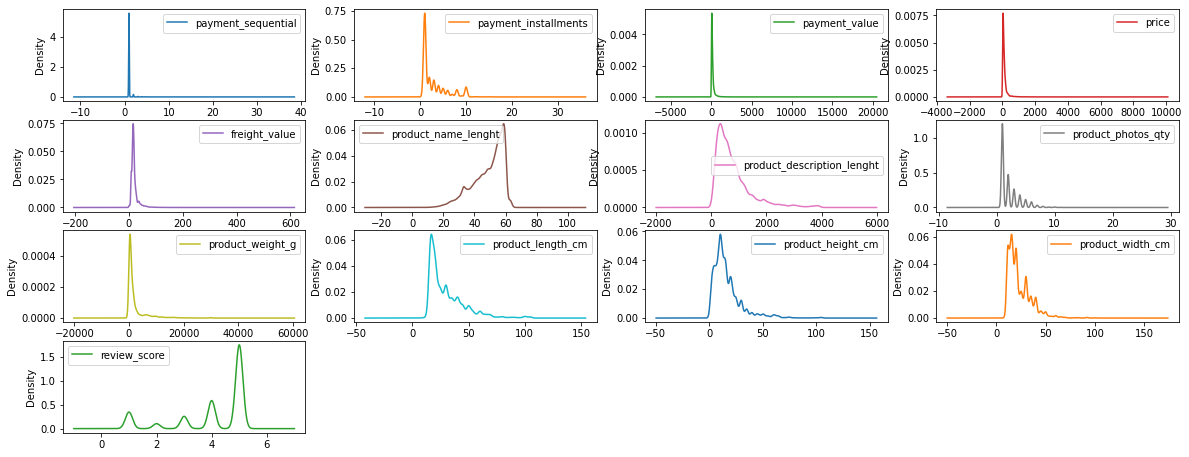

In [91]:
olist.plot(kind='density', layout =(10,4), subplots=True, sharex=False, figsize = (20,20))
plt.show

The above distribution and desity plots show the distribution of each numerical feature for both the
positive and negative classes. We can observe that there is an almost complete overlap of 
both the distribution for the positive and negative classes which suggests that it is not 
possible to classify them based only on these features. Lets look at skewness and kurtosis.

#### Skewness and kurtosis

In [92]:
print(olist.dtypes)


order_status                   object
payment_sequential              int64
payment_type                   object
payment_installments            int64
payment_value                 float64
customer_city                  object
customer_state                 object
price                         float64
freight_value                 float64
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
review_score                    int64
seller_city                    object
seller_state                   object
dtype: object


In [93]:
#olist.skew()
numerical_variables_df.skew()

payment_sequential            6.719239
payment_installments               NaN
payment_value                      NaN
price                         0.243333
freight_value                      NaN
product_name_lenght          -1.639796
product_description_lenght   -0.172849
product_photos_qty            0.713532
product_weight_g                   NaN
product_length_cm             0.659806
product_height_cm            -0.302325
product_width_cm              0.486783
review_score                 -1.825465
dtype: float64

In [94]:
#olist.kurtosis()
numerical_variables_df.kurtosis()

payment_sequential            54.203775
payment_installments                NaN
payment_value                       NaN
price                          0.474825
freight_value                       NaN
product_name_lenght            3.725361
product_description_lenght     0.065127
product_photos_qty            -0.738885
product_weight_g                    NaN
product_length_cm             -0.374388
product_height_cm              0.106273
product_width_cm              -0.459695
review_score                   1.916294
dtype: float64

Skewness is the measure of symmetry of the dataset. negative skew shows that the column is skewed to the left
or negatively skewed and positive skewness shows that the column is skewed to the right. 
If skewness = 0, then the dataset follows a normal distribution which is the case for kurtosis as well.

Kurtosis shows if the data is heavy tailed or light tailed. 0 kurtosis is mesokurtic (normal distribution), negative kurtosis 
is platykurtic(flat and thin tails), positive kurtosis (leptokurtic) with peaked distribution and thick tails.

#### Correlation

In [95]:
matrix=numerical_variables_df.corr()
matrix.round(2)

,payment_sequential,payment_installments,payment_value,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
payment_sequential,1.00,-0.15,-0.30,-0.00,0.01,-0.00,-0.02,-0.01,0.03,0.04,0.02,0.03,-0.00
payment_installments,-0.15,1.00,0.40,0.33,0.18,0.02,0.04,-0.00,0.21,0.11,0.11,0.13,-0.04
payment_value,-0.30,0.40,1.00,0.74,0.37,0.03,0.18,0.01,0.42,0.21,0.29,0.22,-0.09
price,-0.00,0.33,0.74,1.00,0.43,0.06,0.23,0.06,0.51,0.26,0.33,0.28,0.01
freight_value,0.01,0.18,0.37,0.43,1.00,0.03,0.11,0.02,0.48,0.30,0.30,0.30,-0.02
product_name_lenght,-0.00,0.02,0.03,0.06,0.03,1.00,0.08,0.13,0.07,0.07,-0.04,0.07,-0.01
product_description_lenght,-0.02,0.04,0.18,0.23,0.11,0.08,1.00,0.11,0.10,-0.01,0.14,-0.08,0.02
product_photos_qty,-0.01,-0.00,0.01,0.06,0.02,0.13,0.11,1.00,0.01,0.03,-0.09,-0.01,0.03
product_weight_g,0.03,0.21,0.42,0.51,0.48,0.07,0.10,0.01,1.00,0.61,0.54,0.62,-0.02
product_length_cm,0.04,0.11,0.21,0.26,0.30,0.07,-0.01,0.03,0.61,1.00,0.22,0.60,-0.01


In [96]:
#px.imshow(matrix.round(2), width=1000, height=1000)


<Axes: >

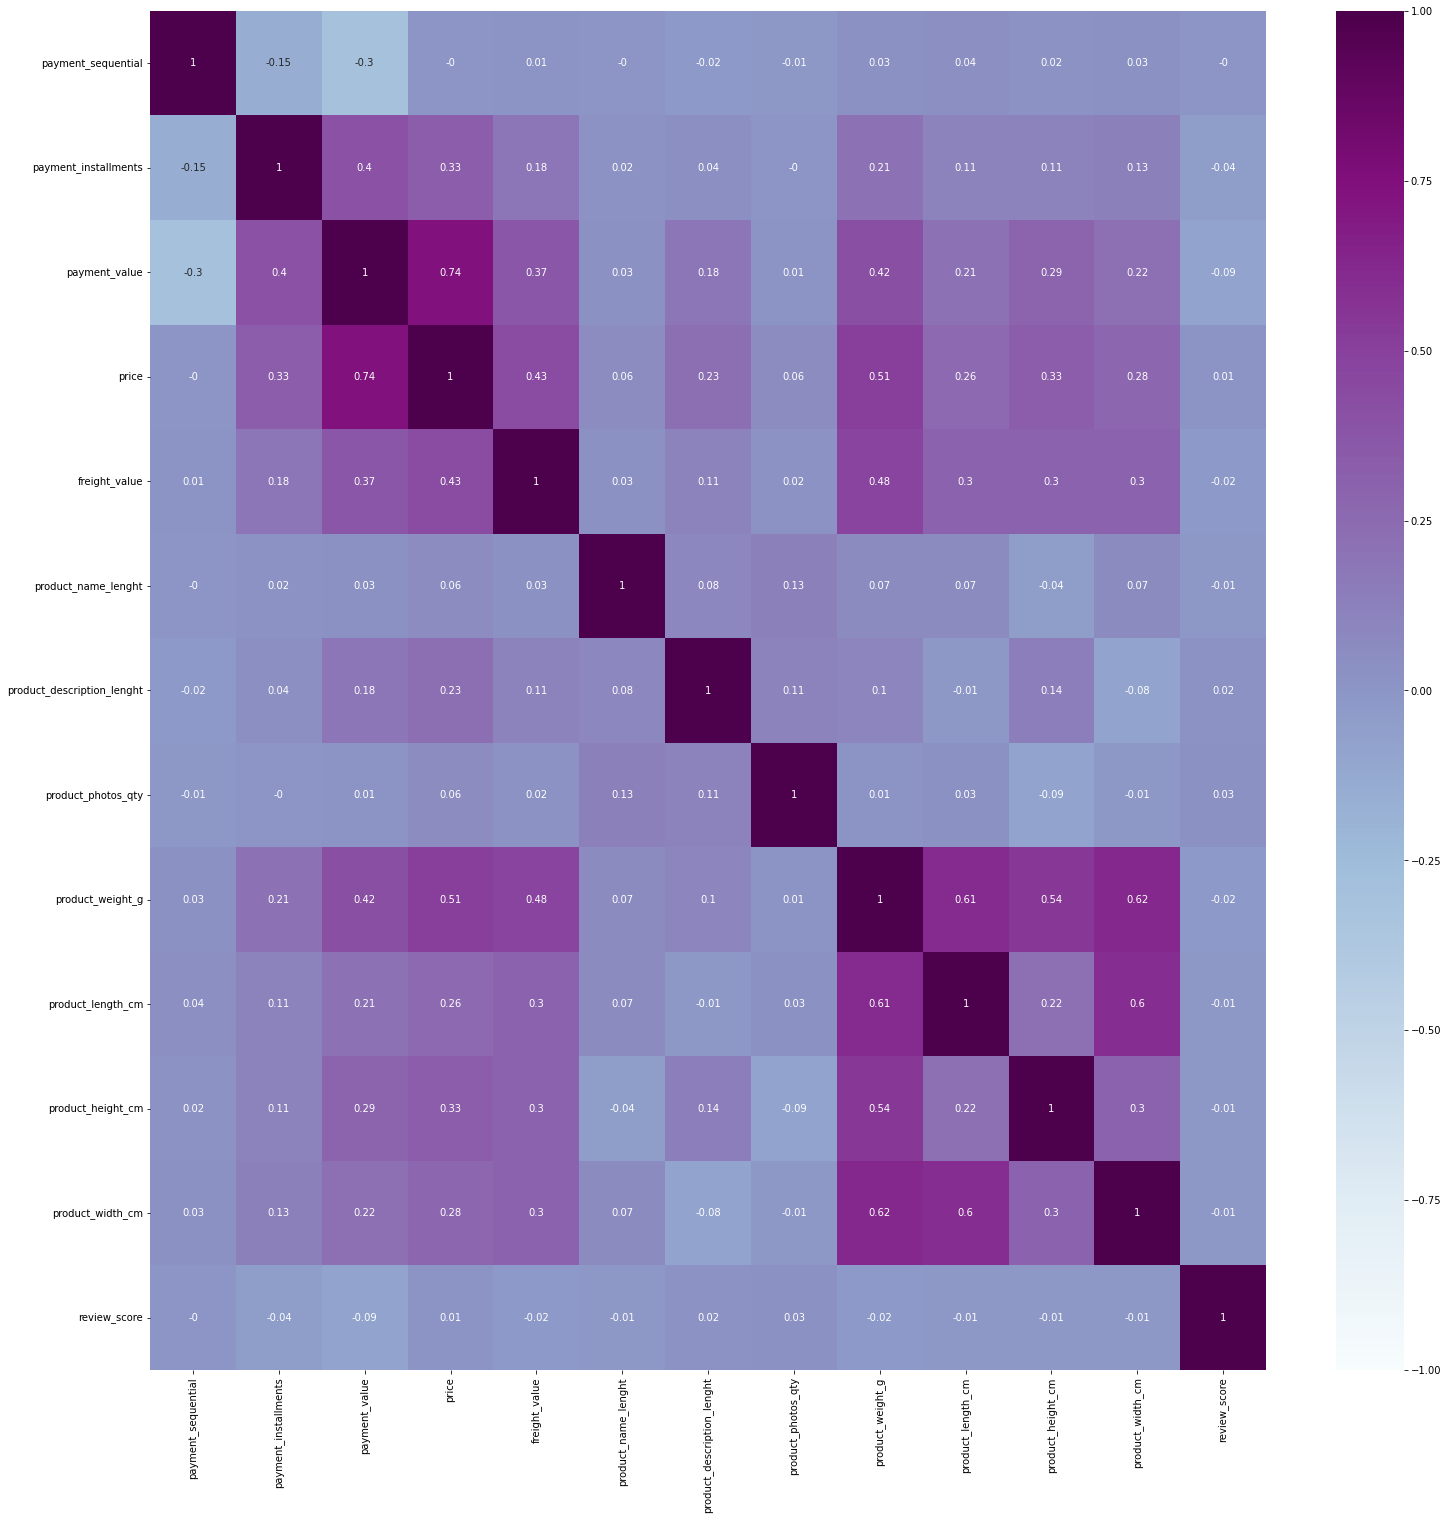

In [97]:
fig = plt.figure(figsize = (25,25))
sns.heatmap(matrix.round(2), vmax=1, vmin=-1, cmap='BuPu',annot=True)

### Statistics

### anova

#### one_sample ttest

In [98]:
olist.price.mean()

119.86973996608253

hypothesis,

𝐻_0: 𝑥 ̅_price=𝜇_price (120);
𝐻_1: 𝑥 ̅_price≠𝜇_price (120)


Level of significance is 95% (𝛼=0.05) ;;
Rejection criterion. If p-value is less than 0.05 reject null hypothesis 


In [99]:
from scipy.stats import ttest_1samp

In [100]:
tscore, pvalue = ttest_1samp(olist.price, popmean=120.02)
print("t Statistic: {:.4f}".format(tscore))  
print("P Value: {:.4f}".format(pvalue))
print()
print('************ Decision rule***********')
print()
if pvalue<0.05:
    print('The p-value is less than aplha = 0.05, reject the null hypothesis')
else:
    print('Since p-value is greater than 0.05, there is no sufficient evidence to reject the null hypothesis')

t Statistic: -0.2791
P Value: 0.7801

************ Decision rule***********

Since p-value is greater than 0.05, there is no sufficient evidence to reject the null hypothesis


So, the population mean = hypothesised mean.

#### Multiple linear regression

In [101]:
import statsmodels.api as sm

In [102]:
predictors = olist[['freight_value', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score']]
response = olist.price

mult_mod = sm.OLS(response, predictors)
mult_res = mult_mod.fit()
print(mult_res.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                          2.325e+04
Date:                Sat, 24 Feb 2024   Prob (F-statistic):                        0.00
Time:                        20:06:48   Log-Likelihood:                     -6.9951e+05
No. Observations:              113216   AIC:                                  1.399e+06
Df Residuals:                  113204   BIC:                                  1.399e+06
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

From the above results the predictors achieved R-squared of over 70% so they are statistically significant for
prediction of price.

#### Machine Learning

In [103]:
import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost
from xgboost import XGBRFRegressor

from sklearn. model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [104]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
def encode():
    le = LabelEncoder()

    for col in categorical_variables_df:
        olist[col] = le.fit_transform(olist[col].astype(str))
    print (olist.info())
    
encode()

<class 'pandas.core.frame.DataFrame'>
Index: 113216 entries, 0 to 114841
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   order_status                113216 non-null  int32  
 1   payment_sequential          113216 non-null  int64  
 2   payment_type                113216 non-null  int32  
 3   payment_installments        113216 non-null  int64  
 4   payment_value               113216 non-null  float64
 5   customer_city               113216 non-null  int32  
 6   customer_state              113216 non-null  int32  
 7   price                       113216 non-null  float64
 8   freight_value               113216 non-null  float64
 9   product_category_name       113216 non-null  int32  
 10  product_name_lenght         113216 non-null  float64
 11  product_description_lenght  113216 non-null  float64
 12  product_photos_qty          113216 non-null  float64
 13  product_weight_g   

In [105]:
olist.head(2)

,order_status,payment_sequential,payment_type,payment_installments,payment_value,customer_city,customer_state,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,seller_city,seller_state
0,1,1,1,1,18.12,3552,25,29.99,8.72,72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,317,21
1,1,3,3,1,2.00,3552,25,29.99,8.72,72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4,317,21


In [106]:
olist.shape

(113216, 20)

## ml

In [107]:
import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor
from math import sqrt

#### split data for feature selecion

In [108]:
# we will be predicting price
X = olist.drop(['price'], axis = 1)
y = olist.price

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)
print('Train predictors: {} and train labels: {}'.format(X_train.shape, y_train.shape))
print('Test predictors: {} and test labels: {}'.format(X_test.shape, y_test.shape))

Train predictors: (79251, 19) and train labels: (79251,)
Test predictors: (33965, 19) and test labels: (33965,)


##### Split data with the significant features for model training


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19)
print('Train predictors: {} and train labels: {}'.format(X_train.shape, y_train.shape))
print('Test predictors: {} and test labels: {}'.format(X_test.shape, y_test.shape))

Train predictors: (79251, 19) and train labels: (79251,)
Test predictors: (33965, 19) and test labels: (33965,)


#### Training machine learning models

In [111]:
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

linear regression

In [112]:
LinReg = LinearRegression().fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(LinReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(LinReg.score(X_test, y_test)))

R-squared of the training: 0.581
R-squared of the test: 0.609


In [113]:
price_predicted = LinReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100



print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE= {:.3f}%'.format(mape))

RMSE: 114.088
MSE: 13016.133
MAE: 53.190
MAPE= 69.299%


Random forest regression

In [114]:
RFReg = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(RFReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(RFReg.score(X_test, y_test)))

price_predicted = RFReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test - price_predicted)
mape = np.mean(difference / y_test) * 100

print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))


R-squared of the training: 0.985
R-squared of the test: 0.894
RMSE: 59.318
MSE: 3518.588
MAE: 18.377
MAPE: 21.364


Bagging Regression

In [115]:
BReg = BaggingRegressor(n_estimators=100, max_features=1.0, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(BReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(BReg.score(X_test, y_test)))

price_predicted = BReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test - price_predicted)
mape = np.mean(difference / y_test) * 100

print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))


R-squared of the training: 0.987
R-squared of the test: 0.895
RMSE: 59.162
MSE: 3500.110
MAE: 17.131
MAPE: 18.390


Gradient Boost Regression

In [116]:
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=11, random_state=100).fit(X_train, y_train)
print('R-squared of the training: {:.3f}'.format(GBReg.score(X_train, y_train)))
print('R-squared of the test: {:.3f}'.format(GBReg.score(X_test, y_test)))

price_predicted = GBReg.predict(X_test)

RMSE = np.sqrt(mean_squared_error(price_predicted, y_test))
MSE = mean_squared_error(price_predicted, y_test)
MAE = mean_absolute_error(price_predicted, y_test)
difference = np.abs(y_test-price_predicted)
mape = np.mean(difference/y_test)*100


print('RMSE: {:.3f}'.format(RMSE))
print('MSE: {:.3f}'.format(MSE))
print('MAE: {:.3f}'.format(MAE))
print('MAPE: {:.3f}'.format(mape))

R-squared of the training: 0.998
R-squared of the test: 0.893
RMSE: 59.672
MSE: 3560.733
MAE: 15.941
MAPE: 18.382


#### Standardize 

In [117]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regression
RFReg_scaled = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=100).fit(X_train_scaled, y_train)
print('Random Forest Regression:')
print('R-squared of the training: {:.3f}'.format(RFReg_scaled.score(X_train_scaled, y_train)))
print('R-squared of the test: {:.3f}'.format(RFReg_scaled.score(X_test_scaled, y_test)))
print()

# Bagging Regression
BReg_scaled = BaggingRegressor(n_estimators=100, max_features=1.0, random_state=100).fit(X_train_scaled, y_train)
print('Bagging Regression:')
print('R-squared of the training: {:.3f}'.format(BReg_scaled.score(X_train_scaled, y_train)))
print('R-squared of the test: {:.3f}'.format(BReg_scaled.score(X_test_scaled, y_test)))
print()

# Gradient Boosting Regression
GBReg_scaled = GradientBoostingRegressor(n_estimators=200, max_depth=11, random_state=100).fit(X_train_scaled, y_train)
print('Gradient Boosting Regression:')
print('R-squared of the training: {:.3f}'.format(GBReg_scaled.score(X_train_scaled, y_train)))
print('R-squared of the test: {:.3f}'.format(GBReg_scaled.score(X_test_scaled, y_test)))
print()


Random Forest Regression:
R-squared of the training: 0.985
R-squared of the test: 0.894

Bagging Regression:
R-squared of the training: 0.987
R-squared of the test: 0.895

Gradient Boosting Regression:
R-squared of the training: 0.998
R-squared of the test: 0.893



#### Prediction

In [118]:
np.set_printoptions(precision=2)
y_pred = GBReg.predict(X_train)
pred = np.concatenate(( y_pred, y_test),0)
pred.shape

(113216,)

In [119]:
#GETTING ACCURACY
from sklearn.metrics import r2_score
y_pred = GBReg.predict(X_test)
print(r2_score(y_test, y_pred))

0.8931700971448588


In [120]:
submission = pd.DataFrame({
        "price": olist["price"],
        "price_predicted": pred
    })

submission.to_csv('price_predicted.csv', index=True)

The ML code performs several tasks related to training and evaluating machine learning models for predicting the price of items. Let's break down each section and explain what it does:

1. **Data Splitting for Feature Selection**:
   - The code initially splits the data into features (X) and the target variable (y). Here, the target variable is the price, and X contains all other features except the price.
   - It then splits the data into training and testing sets using the `train_test_split` function from `sklearn.model_selection`. This split is typically done to evaluate the performance of machine learning models on unseen data.

2. **Training Machine Learning Models**:
   - It trains several machine learning models such as Linear Regression, Random Forest Regression, Bagging Regression, and Gradient Boosting Regression using the training data.
   - For each model, it prints the R-squared score of the training and test sets, as well as metrics like RMSE (Root Mean Squared Error), MSE (Mean Squared Error), MAE (Mean Absolute Error), and MAPE (Mean Absolute Percentage Error) calculated using predictions on the test set.

3. **Standardization**:
   - After splitting the data, it standardizes the features using `StandardScaler` from `sklearn.preprocessing`. Standardization is a common preprocessing step where the mean is subtracted from each feature and then divided by its standard deviation. This ensures that all features are on the same scale.

4. **Retraining Models with Standardized Data**:
   - It retrains the Random Forest Regression, Bagging Regression, and Gradient Boosting Regression models using the standardized training data and evaluates their performance on the standardized test data.
   - Again, it prints the R-squared scores of the training and test sets for each model.

5. **Prediction**:
   - It makes predictions on the training set using the Gradient Boosting Regression model and concatenates these predictions with the actual prices from the test set.
   - It evaluates the accuracy of predictions using the R-squared score.

6. **Saving Predictions to a CSV file**:
   - Finally, it creates a DataFrame containing the actual prices and the predicted prices, and saves it to a CSV file named `price_predicted.csv`.

Recommendations:
- Based on the results, it seems that the Gradient Boosting Regression model performs the best among the models evaluated, as it has the highest R-squared score on the test set.
- It's a good practice to further analyze the feature importance provided by the trained models to understand which features have the most significant impact on predicting the price. This analysis could help in feature selection and potentially improve model performance.
- Consider hyperparameter tuning for the models to optimize their performance further. Techniques like grid search or random search can be employed to find the best hyperparameters.
- If the dataset contains categorical variables, consider encoding them properly before training the models. Techniques like one-hot encoding or label encoding may be necessary depending on the nature of the data and the algorithms used.
- Evaluate the models' performance on various metrics, not just R-squared, to get a comprehensive understanding of their strengths and weaknesses.
- Consider exploring more advanced techniques such as ensemble methods or neural networks if further improvement in predictive performance is desired.